In [140]:
# Importing pandas library and having it read salary csv
import pandas as pd
degree_salaries = pd.read_csv('college-salaries/degrees-that-pay-back.csv')
degree_salaries.head()

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Accounting,"$46,000.00","$77,100.00",67.6,"$42,200.00","$56,100.00","$108,000.00","$152,000.00"
1,Aerospace Engineering,"$57,700.00","$101,000.00",75.0,"$64,300.00","$82,100.00","$127,000.00","$161,000.00"
2,Agriculture,"$42,600.00","$71,900.00",68.8,"$36,300.00","$52,100.00","$96,300.00","$150,000.00"
3,Anthropology,"$36,800.00","$61,500.00",67.1,"$33,800.00","$45,500.00","$89,300.00","$138,000.00"
4,Architecture,"$41,600.00","$76,800.00",84.6,"$50,600.00","$62,200.00","$97,000.00","$136,000.00"


In [64]:
# In our analysis we are comparing STEM degrees against Humanities
# We are also only interested in intial starting salary as this is the only amount that concerns a recruitment agency
salaries_2 = degree_salaries[['Undergraduate Major', 'Starting Median Salary', 'Percent change from Starting to Mid-Career Salary']].copy()
salaries_2.head()

,Undergraduate Major,Starting Median Salary,Percent change from Starting to Mid-Career Salary
0,Accounting,"$46,000.00",67.6
1,Aerospace Engineering,"$57,700.00",75.0
2,Agriculture,"$42,600.00",68.8
3,Anthropology,"$36,800.00",67.1
4,Architecture,"$41,600.00",84.6


In [120]:
# Declaring what constitutes a STEM degree and what is a Humanities degree
STEM_list = ('Physics', 'Mechanical Engineering', 'Math', 'Information Technology', 'Management Information Systems', 'Electrical Engineering', 'Chemical Engineering', 'Biology', 'Chemistry', 'Computer Engineering', 'Computer Science')
humanities_list = ('Geography','Anthropology', 'Archaeology', 'Classics', 'History', 'Art History', 'English', 'Linguistics', 'Law', 'Politics', 'Literature', 'Philosophy', 'Religion', 'Journalism', 'Film')      

In [121]:
# Selecting the rows for Humanities degrees from our intial df and putting them into another df.
humanities_df = salaries_2[salaries_2['Undergraduate Major'].isin(humanities_list)]
pd.DataFrame.reset_index(humanities_df, drop= True, inplace= True)
humanities_df

,Undergraduate Major,Starting Median Salary,Percent change from Starting to Mid-Career Salary
0,Anthropology,"$36,800.00",67.1
1,Art History,"$35,800.00",81.3
2,English,"$38,000.00",70.3
3,Film,"$37,900.00",80.7
4,Geography,"$41,200.00",59.0
5,History,"$39,200.00",81.1
6,Journalism,"$35,600.00",87.4
7,Philosophy,"$39,900.00",103.5
8,Religion,"$34,100.00",52.5


In [75]:
import re

In [130]:
# Creating a new column of salary figures stored as floats with no comma
humanities_df['Sal'] = humanities_df['Starting Median Salary'].apply(lambda x: float(x[1:].replace(',','')))
humanities_df

/Users/sarazylfo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Undergraduate Major,Starting Median Salary,Percent change from Starting to Mid-Career Salary,Sal
0,Anthropology,"$36,800.00",67.1,36800.0
1,Art History,"$35,800.00",81.3,35800.0
2,English,"$38,000.00",70.3,38000.0
3,Film,"$37,900.00",80.7,37900.0
4,Geography,"$41,200.00",59.0,41200.0
5,History,"$39,200.00",81.1,39200.0
6,Journalism,"$35,600.00",87.4,35600.0
7,Philosophy,"$39,900.00",103.5,39900.0
8,Religion,"$34,100.00",52.5,34100.0


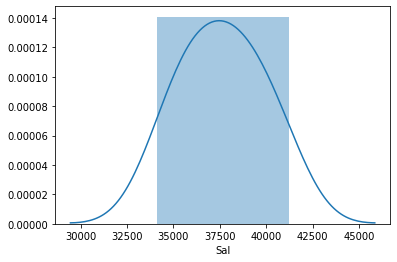

In [119]:
# Creating a distribution using the humanities salaries.
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns

humanities_dist = sns.distplot(humanities_df['Sal'])

In [122]:
# Selecting the rows for STEM degrees from our initial df and putting them into another df.
STEM_df = salaries_2[salaries_2['Undergraduate Major'].isin(STEM_list)]
pd.DataFrame.reset_index(STEM_df, drop= True, inplace=True)
STEM_df

,Undergraduate Major,Starting Median Salary,Percent change from Starting to Mid-Career Salary
0,Biology,"$38,800.00",67.0
1,Chemical Engineering,"$63,200.00",69.3
2,Chemistry,"$42,600.00",87.6
3,Computer Engineering,"$61,400.00",71.0
4,Computer Science,"$55,900.00",70.8
5,Electrical Engineering,"$60,900.00",69.1
6,Math,"$45,400.00",103.5
7,Mechanical Engineering,"$57,900.00",61.7
8,Physics,"$50,300.00",93.4


In [123]:
# Creating a new column of salary figures stored as floats with no comma
STEM_df['Sal'] = STEM_df['Starting Median Salary'].apply(lambda x: float(x[1:].replace(',','')))

/Users/sarazylfo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


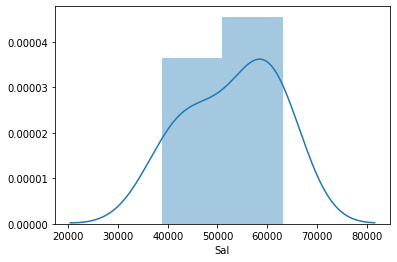

In [124]:
# # Creating a distribution using the STEM salaries.
STEM_dist = sns.distplot(STEM_df['Sal'])

In [136]:
# Placing the salaries into an array to conduct normality tests
hum_array = humanities_df['Sal']
hum_array.to_numpy()

array([36800., 35800., 38000., 37900., 41200., 39200., 35600., 39900.,
       34100.])

In [137]:
# Placing the salaries into an array to conduct normality tests
stem_array = STEM_df['Sal']
stem_array.to_numpy()

array([38800., 63200., 42600., 61400., 55900., 60900., 45400., 57900.,
       50300.])

In [145]:
# The second value is the p value
stats.shapiro(hum_array)

(0.9826117753982544, 0.9763524532318115)

In [144]:
# Since the two samples contain 8 values, I do not believe that this test is reliable. 
# The null hypothesis assumes normality in our data. If the p value is less than 0.05
# then we can accept the null hypothesis, which is not the case here. 
stats.shapiro(stem_array)

(0.9131221175193787, 0.3383428454399109)

In [141]:
# General literature claims that the test has little power with small samples. The p value is very small indicating 
# that the mean values of the ranks of the two samples are very different. 
# Again, this test approximates p values using a Gaussian distribution for samples over 100, which is not the case.
stats.mannwhitneyu(stem_array, hum_array, alternative='two-sided')

MannwhitneyuResult(statistic=78.0, pvalue=0.0010862466258220339)

In [139]:
# Since we have a small sample a T-Test is appropriate. The difference betwen the two degree subcategories is 5
# this means that a Welch's T-Test would be most appropriate as it does not make assumptions of equal sample size
# like the Students T-Test. Welchs assumes that the data is normally distributed which I have not been able to prove 
# due to very small sample sizes.
import scipy.stats as stats
 
t_welch, p_welch = stats.ttest_ind(stem_array, hum_array, equal_var=False)
print(t_welch)
print(p_welch)

4.96600099883655
0.0007693328742981811


In [ ]:
# Since our sample sizes are the same our degrees of freedom is n-1 so 16-1= 15.
# Due to the small sample sizes, we will look to external literature to determine if we are expecting to see a 
# statistically singificant difference between our two samples.  

In [ ]:
# In the US, across all industries, the college graduates with an arts and humanities bachelor degree earn $50,000 
# compared with $63,000 earned by STEM graduates. 